In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datadir = '/content/drive/MyDrive/Segmented Medicinal Leaf Images'
categories = os.listdir(datadir)

In [4]:
len(categories)

30

In [5]:
from keras.preprocessing import image

In [6]:
data = []
for category in categories:
  path = os.path.join(datadir, category)
  labels = categories.index(category)
  for imgpath in os.listdir(path):
    imgs = image.load_img(os.path.join(path, imgpath),target_size=(224,224))
    data.append((imgs, labels))

In [7]:
len(data)

1835

In [8]:
import random

In [9]:
random.shuffle(data)

In [10]:
X_img = []
y_lab = []
for img , label in data:
  X_img.append(img)
  y_lab.append(label)

In [11]:
X_list = [ image.img_to_array(img) for img in X_img]

In [12]:
type(X_list)

list

In [13]:
import numpy as np

In [14]:
X = np.asarray(X_list)

In [15]:
type(X)

numpy.ndarray

In [16]:
X.shape

(1835, 224, 224, 3)

In [17]:
X /= 255

In [18]:
import matplotlib.pyplot as plt

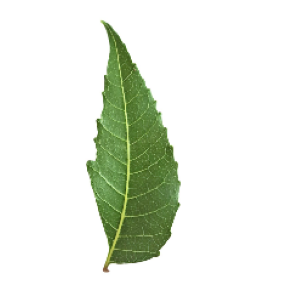

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(X[170])
plt.axis('off')
plt.show()

In [20]:
Y = np.asarray(y_lab)

In [21]:
Y.shape

(1835,)

## finally preprocessed data as X and Lables as Y

In [22]:
# import necessary library
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import *

In [23]:
# build model function
def build_model():

  v2model = MobileNetV2(input_shape=[224,224,3], weights='imagenet', include_top=False)
  
  x = Flatten()(v2model.output)
  prediction = Dense(len(categories), activation='softmax')(x)

  model = Model(inputs=v2model.input, outputs=prediction)

  for layer in v2model.layers:
    layer.trainable = False
  return model



In [24]:
# 3 fold cross validation

In [25]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, TensorBoard
from keras.models import Model

In [26]:
kf = KFold(n_splits=5)

In [27]:
ACCURACY = []
LOSS = []

count = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = build_model()

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    callbacks = [EarlyStopping(monitor='val_accuracy', patience=2,verbose=2),TensorBoard(log_dir=f'./logs{count}')]

    history = model.fit(X_train ,y_train,batch_size = 32,epochs = 10,verbose = 2,callbacks=callbacks ,validation_data=(X_test,y_test))
  
    results = model.evaluate(X_test, y_test)  #returns ['loss','accuracy']
    print('fold = ',count, 'loss and val_accuracy',results)

    ACCURACY.append(results[1])
    LOSS.append(results[0])

    count += 1
  
 

9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/10
46/46 - 39s - loss: 4.3331 - accuracy: 0.7357 - val_loss: 1.2004 - val_accuracy: 0.9019
Epoch 2/10
46/46 - 2s - loss: 0.2171 - accuracy: 0.9775 - val_loss: 0.6582 - val_accuracy: 0.9482
Epoch 3/10
46/46 - 2s - loss: 0.0925 - accuracy: 0.9877 - val_loss: 0.9262 - val_accuracy: 0.9319
Epoch 4/10
46/46 - 2s - loss: 0.0302 - accuracy: 0.9952 - val_loss: 0.5304 - val_accuracy: 0.9619
Epoch 5/10
46/46 - 2s - loss: 0.0320 - accuracy: 0.9993 - val_loss: 0.4020 - val_accuracy: 0.9755
Epoch 6/10
46/46 - 2s - loss: 0.0133 - accuracy: 0.9980 - val_loss: 0.3264 - val_accuracy: 0.9728
Epoch 7/10
46/46 - 2s - loss: 0.0233 - accuracy: 0.9973 - val_loss: 0.5486 - val_accuracy: 0.9537
Epoch 00007: early stopping
12/12 [==============================] - 0s 39ms/step - loss: 0.5486 - accuracy: 0.9537
fold =  1 loss and val_accuracy [0.5486428737640381, 0.9536784887313843]
Epoch 1/10
46/46 - 6s - loss: 4.1009 - accuracy: 0.7725 - val

In [28]:
a=ACCURACY
a

[0.9536784887313843,
 0.9346048831939697,
 0.9618528485298157,
 0.9591280817985535,
 0.9509536623954773]

In [29]:
b=LOSS
b

[0.5486428737640381,
 0.9406843185424805,
 0.41612398624420166,
 0.4612703323364258,
 0.8717739582061768]

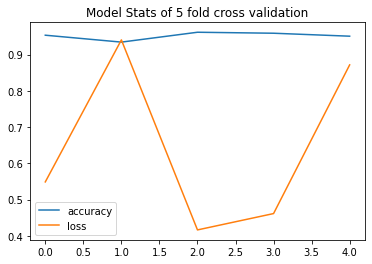

In [30]:
# plot the loss
plt.plot(a, label='accuracy')
plt.plot(b, label='loss')
plt.title("Model Stats of 5 fold cross validation")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')



In [31]:
#%reload_ext tensorboard

In [32]:
#%tensorboard --logdir logs1

In [33]:
#%tensorboard --logdir logs2

In [34]:
#%tensorboard --logdir logs3

In [35]:
#%tensorboard --logdir logs4

In [36]:
#%tensorboard --logdir logs5

In [37]:
#from tensorboard import notebook
#notebook.list() # View open TensorBoard instances

In [38]:
#notebook.display(port=6006, height=1000) 